## Library and Data Import

In [3]:
import pickle
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

Data source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data

In [5]:
df = pd.read_csv('Data Company Bankrupt.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [11]:
# Check null values if any
(df.isna().sum() > 0).sum()

0

### Frequency between bankrupt vs no bankrupt class?

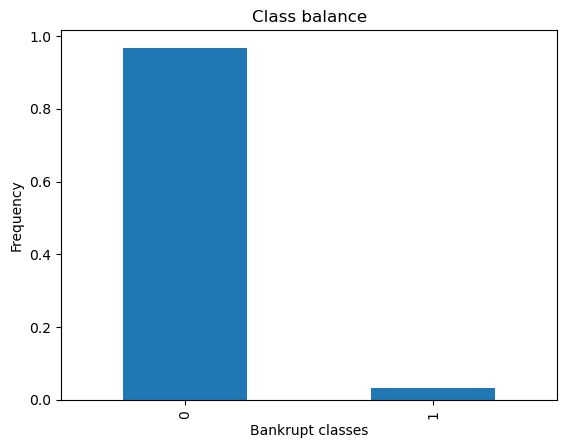

In [12]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequency")
plt.title("Class balance");

### How is the distribution of profit between bankrupt vs no bankrupt?

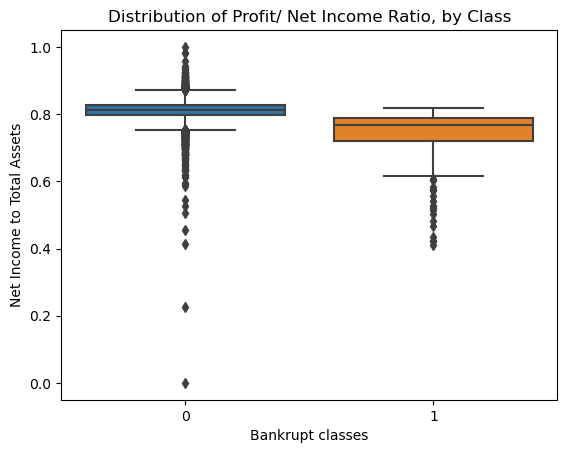

In [13]:
sns.boxplot(x="Bankrupt?" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

In [14]:
df['_Net_Income_to_Total_Assets'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
10%         0.769568
25%         0.796750
50%         0.810619
75%         0.826455
90%         0.844854
max         1.000000
Name: _Net_Income_to_Total_Assets, dtype: float64

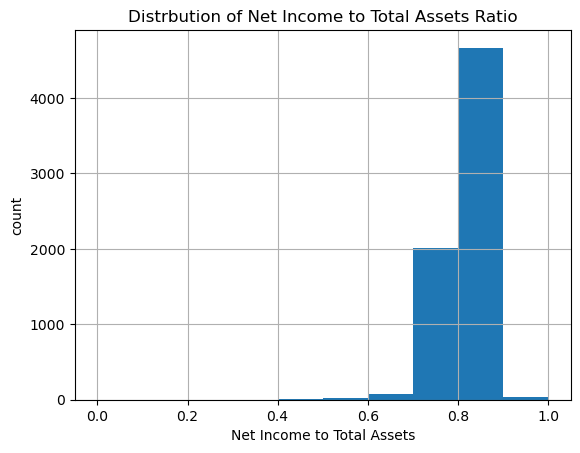

In [15]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

Since the data has many outliers, the distribution only will be seen from p10 to p90 data.

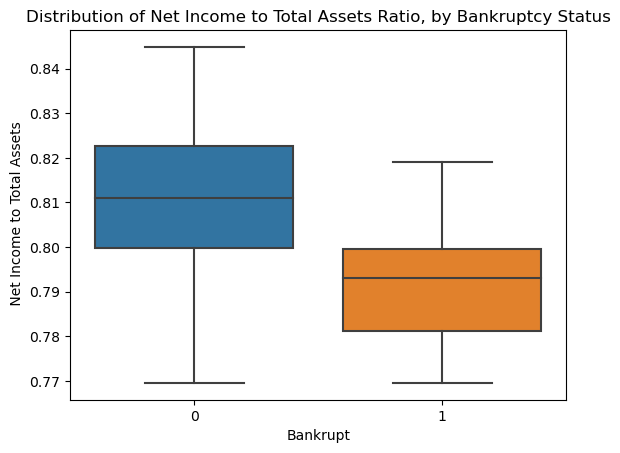

In [16]:
q1 , q9 = df['_Net_Income_to_Total_Assets'].quantile([0.1, 0.9])
mask = df["_Net_Income_to_Total_Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='_Net_Income_to_Total_Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

### Other Distribution

<Axes: >

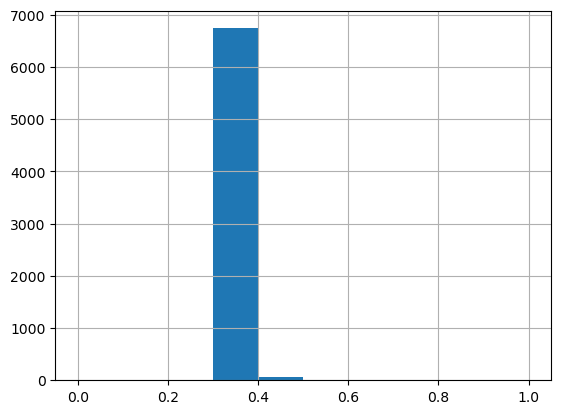

In [17]:
df['_Borrowing_dependency'].hist()

<Axes: >

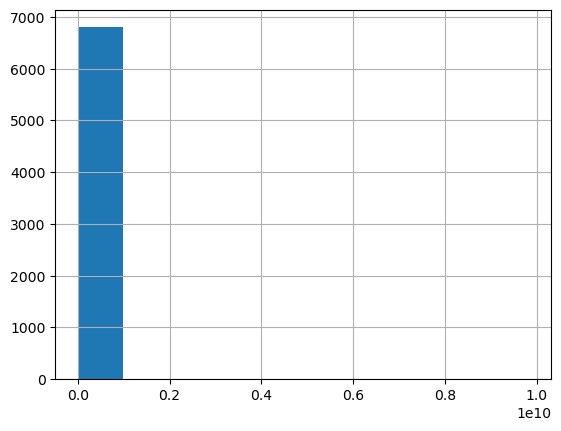

In [18]:
df['_Total_assets_to_GNP_price'].hist()

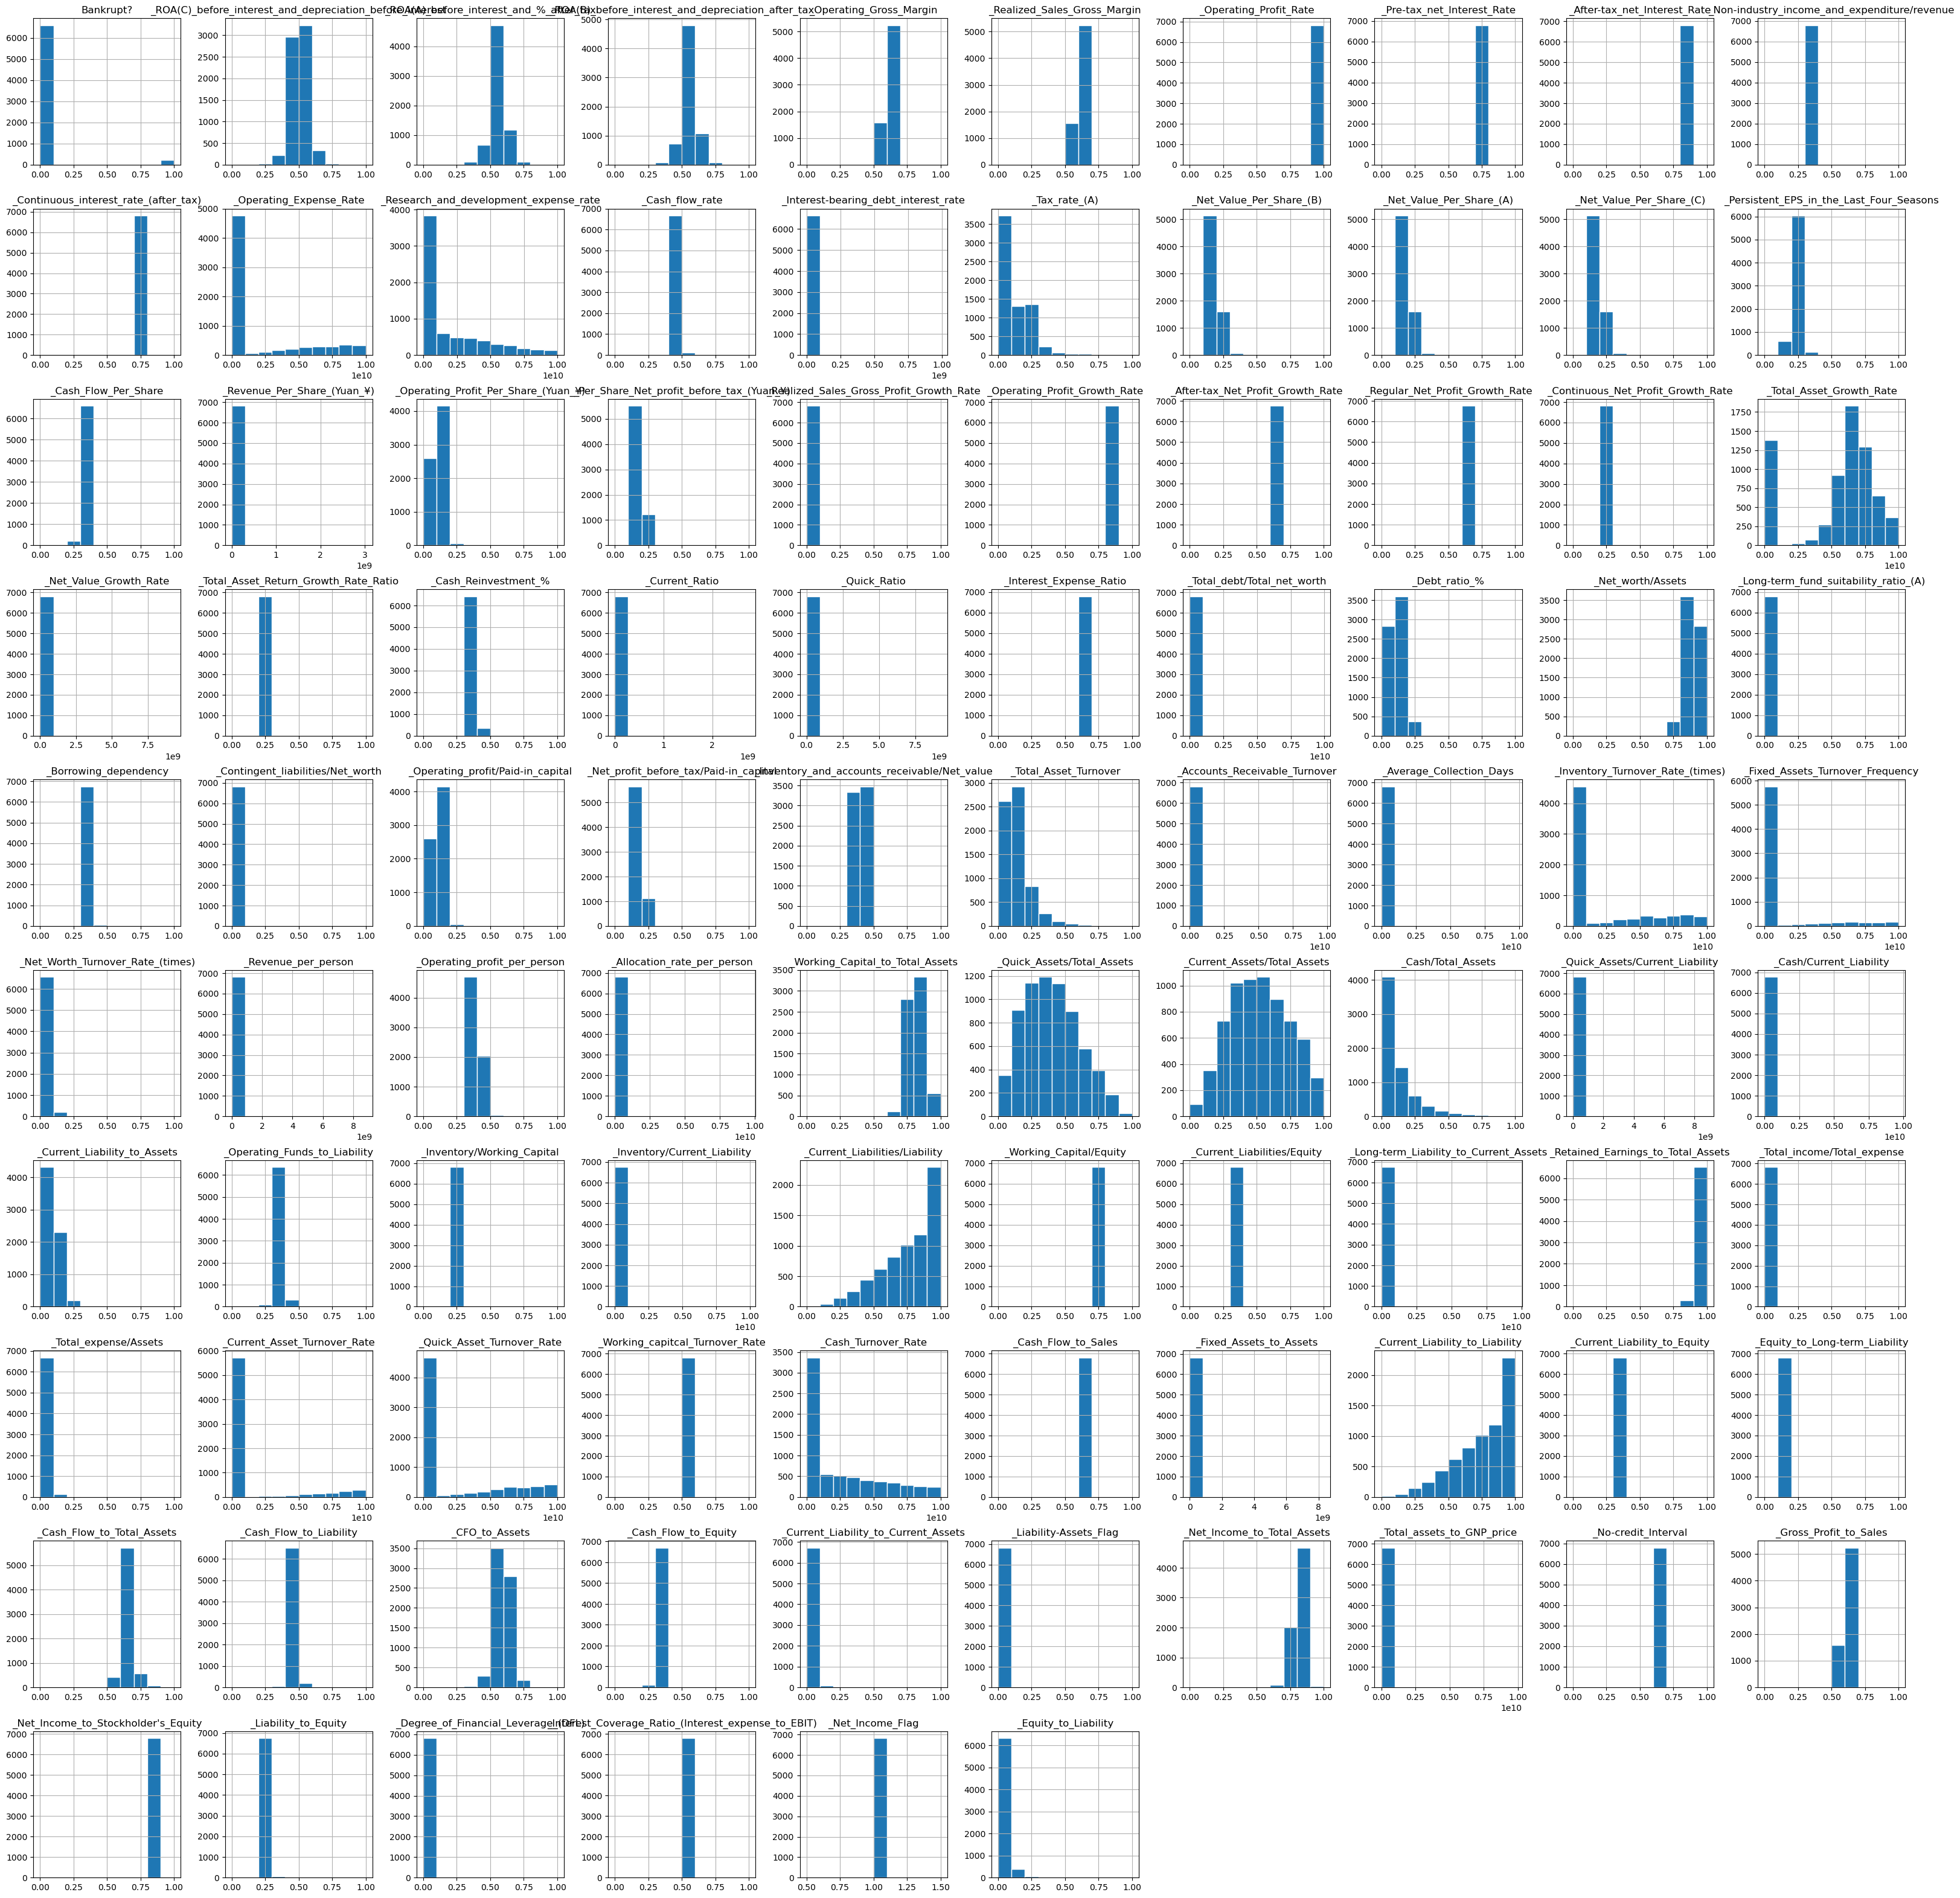

In [19]:
df.hist(figsize=(40,40), edgecolor='white')
plt.show()

### Corelation

<Axes: xlabel="_Net_Income_to_Stockholder's_Equity", ylabel='_Borrowing_dependency'>

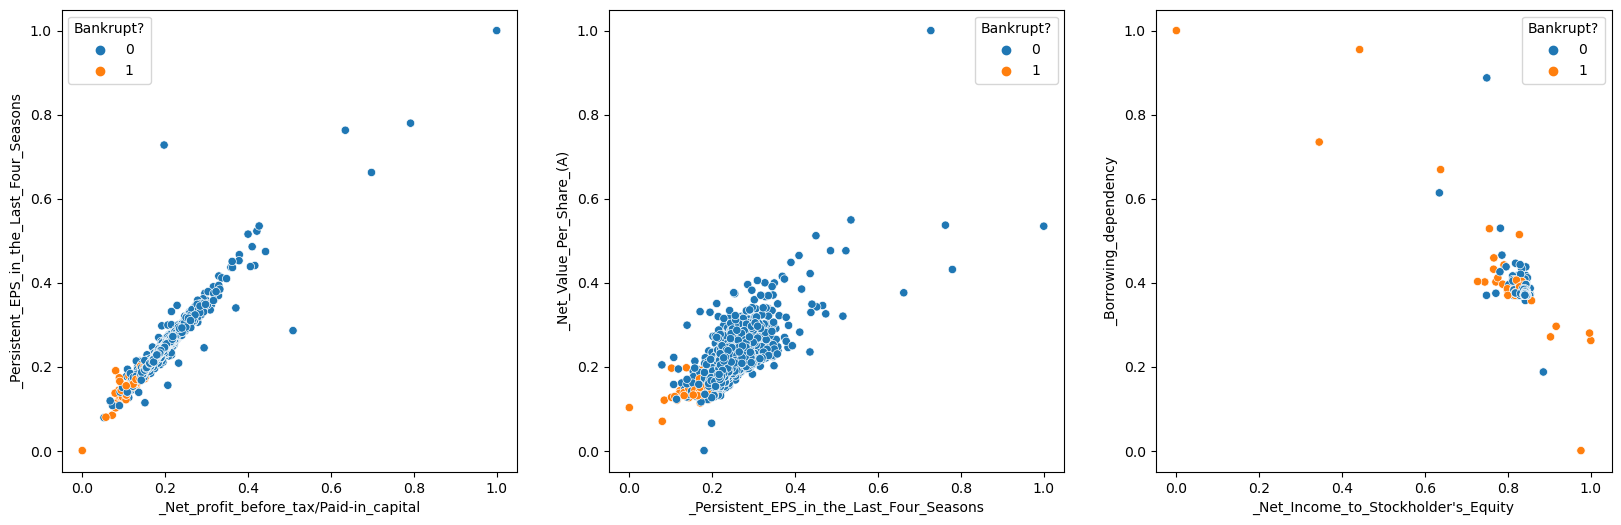

In [20]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

sns.scatterplot(data=df, x='_Net_profit_before_tax/Paid-in_capital', y='_Persistent_EPS_in_the_Last_Four_Seasons', hue='Bankrupt?', ax=ax[0])
sns.scatterplot(data=df, x='_Persistent_EPS_in_the_Last_Four_Seasons', y='_Net_Value_Per_Share_(A)', hue='Bankrupt?', ax=ax[1])
sns.scatterplot(data=df, x="_Net_Income_to_Stockholder's_Equity", y='_Borrowing_dependency', hue='Bankrupt?', ax=ax[2])

### Multicollinearity

<Axes: >

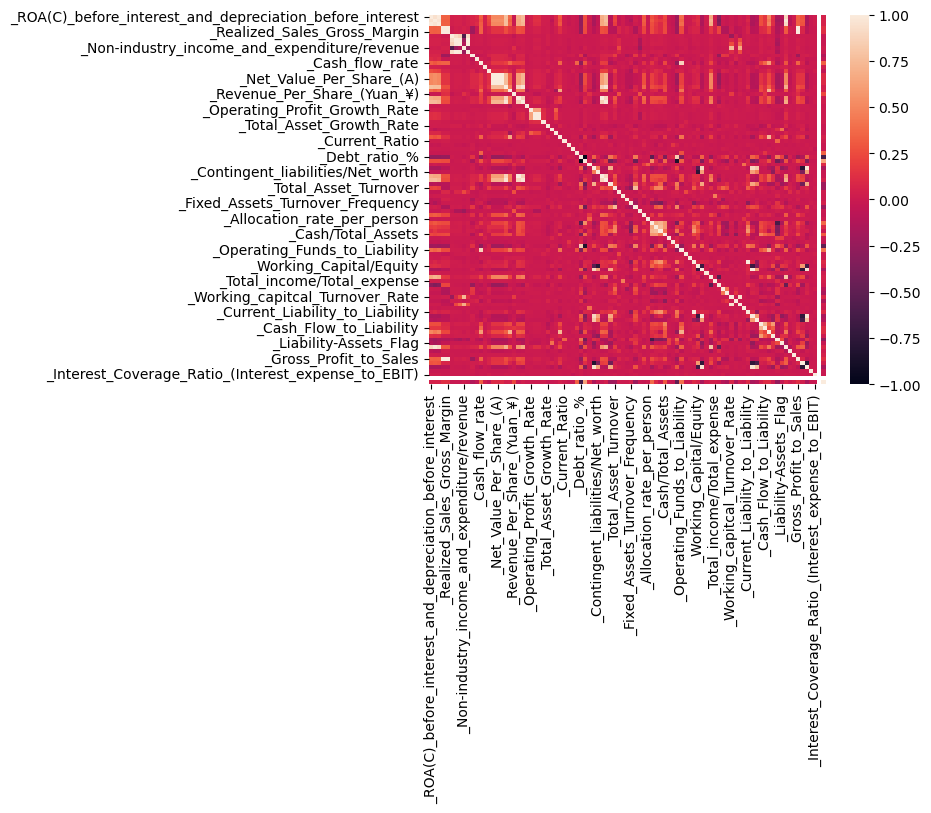

In [21]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr)